# FCN(Fully Convolution Network)

- semantic segmantation의 초석을 닦은 연구

- segmantation `=` `(1)` semantic segmantaion `(2)` instance segmantation

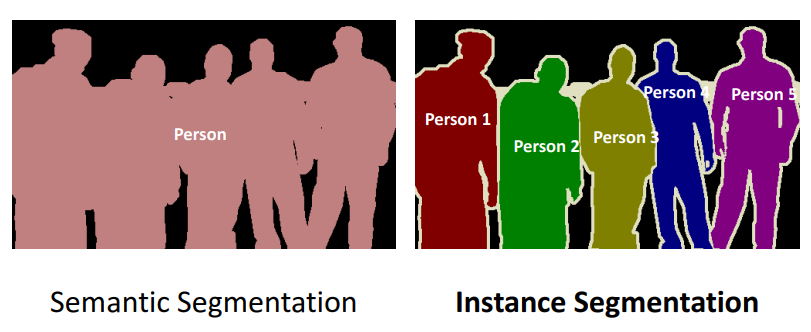

- biomedical image에서는 semantic segmentation을 사용 ex) 의료 영상

## FCN structure

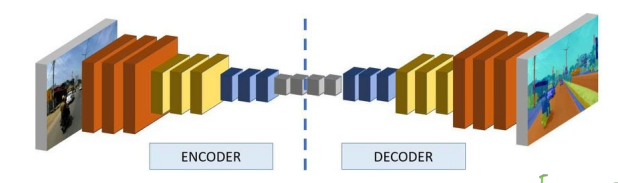

- end-to-end방식
- pixel 단위로 클래스 예측 (from supervised pre-trained)
- encoder - decoder 형태
- 유명한 CNN 아키텍쳐의 특징을 갖고 있음

### encoder: 차원 축소 -> Feature map 획득

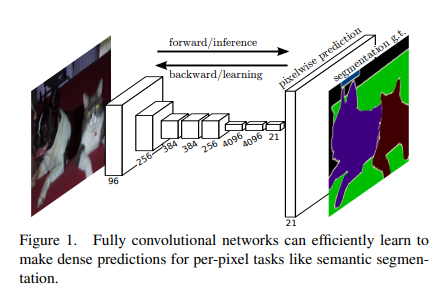

`1` encoder 부분(Downsampling)에서는 [`3 * 3 Conv `-> `3 * 3 Conv` ->  `pooling`](`VGG Net`)을 진행하는 구조

`2` image segmantation은 기본적으로 CNN의 구조를 따라감. 단, CNN 구조의 마지막에 있는 FC layer는 갖고 오지 않음

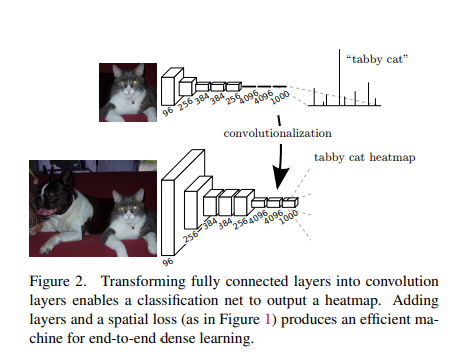

- FC layer를 사용하게 되면 위치정보가 소실됨 `->` Conv layer 사용
- Conv Layer는 `1x1 Conv layer(Google Net)`를 사용하여 채널의 수를 조절
- 채널의 수는 객체의 수와 동일하게 맞춤


`3` [$H$, $W$] 이미지가 `[conv - conv - pooling] (VGG의 구조)`를 n번 통과한다면 이미지의 크기는 [$H/2^n$, $W/2^n$]가 되게 됨

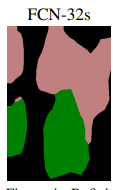

- 이를 다시 말하면 픽셀 하나가 $2^n$개의 픽셀의 정보를 갖고 있다는 뜻 `->` 위치정보를 애매하게 알게 됨
- upsampling 과정에서 대략적인(?) segmantation이 진행됨
- 이를 보완하기 위해서 `skip connection(ResNet)`을 이용

### decoder: Feature map을 upsampling 하여 필요한 정보를 학습

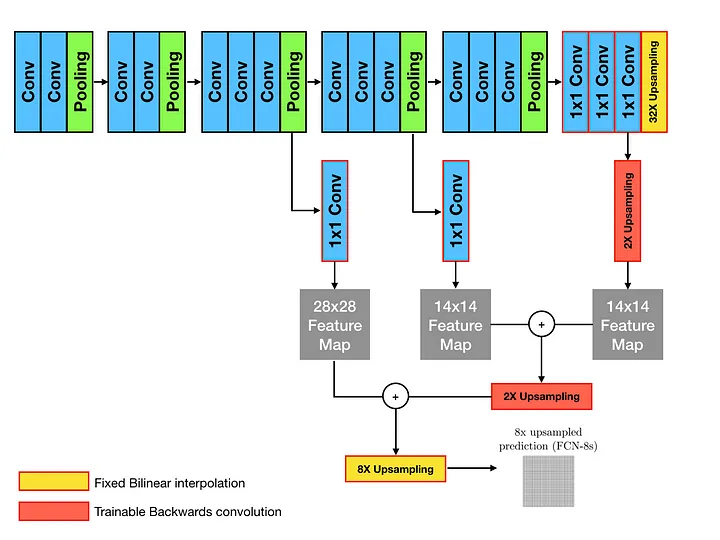

- `1x1 Conv`를 사용해 채널수를 맞추어 `Upsampling`한 `Feature map`과 합침
- 위 과정을 지난 `Feature map`을 다시 한번 `Upsampling`한 후 F`eature map`과 합침
- 마지막에 몇 배로 `Upsampling`을 했는지에 따라서 이름이 바뀜
    - `ex)` 위의 그림은 마지막에 8배로 Upsampling을 했으므로 `FCN-8s`